In [1]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Position CSV/K_stacked.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Roberto Aguayo,0,16,0.000000,Career,NaN,0.0,NaN,198.0,69.0,...,0.0,NaN,196.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Michael Badgley,5,18,4.444444,Career,NaN,1.0,NaN,172.0,77.0,...,0.0,NaN,178.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,Dan Bailey,33,138,3.826087,Career,NaN,0.0,NaN,199.0,57.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,Chris Boswell,16,74,3.459459,Career,NaN,0.0,NaN,164.0,65.0,...,0.0,NaN,200.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,John Brown,36,87,6.620690,NaN,NaN,NaN,NaN,15.0,6.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Career


In [3]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
for col in df.columns: 
    print(col) 

AVp16
adjusted_yards_per_attempt
assists_on_tackles
completed_passes
extra_points_made
field_goals_made
fumbles_forced
fumbles_recovered
fumbles_recovered_for_touchdown
games.y
interceptions
interceptions_returned_for_touchdown
interceptions_thrown
kickoff_return_touchdowns
other_touchdowns
pass_attempts
passes_defended
passing_completion
passing_touchdowns
passing_yards
passing_yards_per_attempt
plays_from_scrimmage
points
punt_return_touchdowns
quarterback_rating
receiving_touchdowns
receiving_yards
receiving_yards_per_reception
receptions
rush_attempts
rush_touchdowns
rush_yards
rush_yards_per_attempt
rushing_and_receiving_touchdowns
sacks
safeties
solo_tackles
tackles_for_loss
total_tackles
total_touchdowns
two_point_conversions
weight
yards_from_scrimmage
yards_from_scrimmage_per_play
yards_recovered_from_fumble
yards_returned_from_interceptions
yards_returned_per_interception


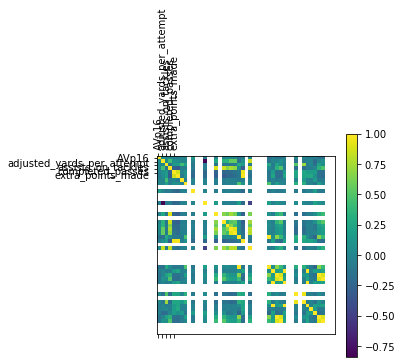

In [6]:
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.show()

#from IPython.display import Image
#img=plt.to_image(format="png")
#Image(img)

In [7]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['adjusted_yards_per_attempt', 'assists_on_tackles', 'completed_passes', 'extra_points_made', 'field_goals_made', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'interceptions_thrown', 'kickoff_return_touchdowns', 'other_touchdowns', 'pass_attempts', 'passes_defended', 'passing_completion', 'passing_touchdowns', 'passing_yards', 'passing_yards_per_attempt', 'plays_from_scrimmage', 'points', 'punt_return_touchdowns', 'quarterback_rating', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rush_attempts', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'rushing_and_receiving_touchdowns', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.8132072725851962
Weights:  [ 4.74294777e-02  2.91546935e-01 -5.27020905e-02  9.95817112e-02
  2.57731920e-01 -2.98372438e-15 -9.71445147e-16 -5.19029264e-15
 -1.83186799e-15  2.66453526e-15 -2.66060897e-03  2.05391260e-15
 -8.32667268e-17 -2.28471591e-01  0.00000000e+00  3.07854377e-02
  0.00000000e+00  9.15717759e-02 -7.22979261e-02 -2.42494250e-01
 -9.11719152e-02  0.00000000e+00 -1.61897604e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.42494250e-01
  0.00000000e+00  1.38757102e-02 -2.58368319e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.18275483e-01  0.00000000e+00
  1.73271452e-01  0.00000000e+00 -4.81974693e-01  1.38757102e-02
 -2.58368319e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]


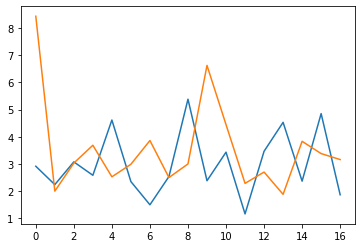

In [8]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['sacks', 'passing_yards', 'points', 'yards_from_scrimmage', 'passing_touchdowns']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.6005845764187185
Weights:  [ 0.00000000e+00 -1.24266594e-01 -1.71365006e-03 -1.62261229e-02
  5.45870090e+00]


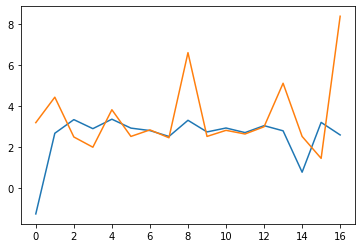

In [10]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  -0.15105647369646458
Weights:  [ 0.          0.01637718 -0.00173143 -0.01762024  0.19101781]


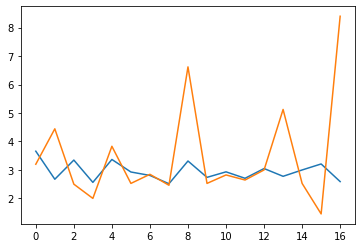

In [11]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [12]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-0.5835860935270861
[ 0.00000000e+00 -1.98690381e-02 -8.40470723e-04 -2.46353608e-02
  1.17332049e+00]

Ridge Regression
-0.3300046246200252
[ 0.00000000e+00  2.99835723e-04 -8.07831666e-04 -2.39754509e-02
  3.18126013e-01]
